<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Hierarchical_Clustering_EastWestAirlines_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/EastWestAirlines.csv')
df.head(5)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
(df==0).all()

ID                   False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award                False
dtype: bool

In [8]:
from sklearn import preprocessing   #package for normalize
df_normalized = preprocessing.normalize(df)
print(df_normalized)

[[3.44815547e-05 9.70414393e-01 0.00000000e+00 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 0.00000000e+00 ... 0.00000000e+00
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 0.00000000e+00 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 0.00000000e+00 ... 0.00000000e+00
  1.79770388e-02 1.28224243e-05]
 [7.30001869e-02 9.96924692e-01 0.00000000e+00 ... 1.81592505e-05
  2.54411099e-02 0.00000000e+00]
 [7.70720943e-01 5.78088626e-01 0.00000000e+00 ... 0.00000000e+00
  2.67960179e-01 0.00000000e+00]]


In [9]:
from scipy.cluster.hierarchy import linkage
z=linkage(df_normalized,method="complete",metric="euclidean")

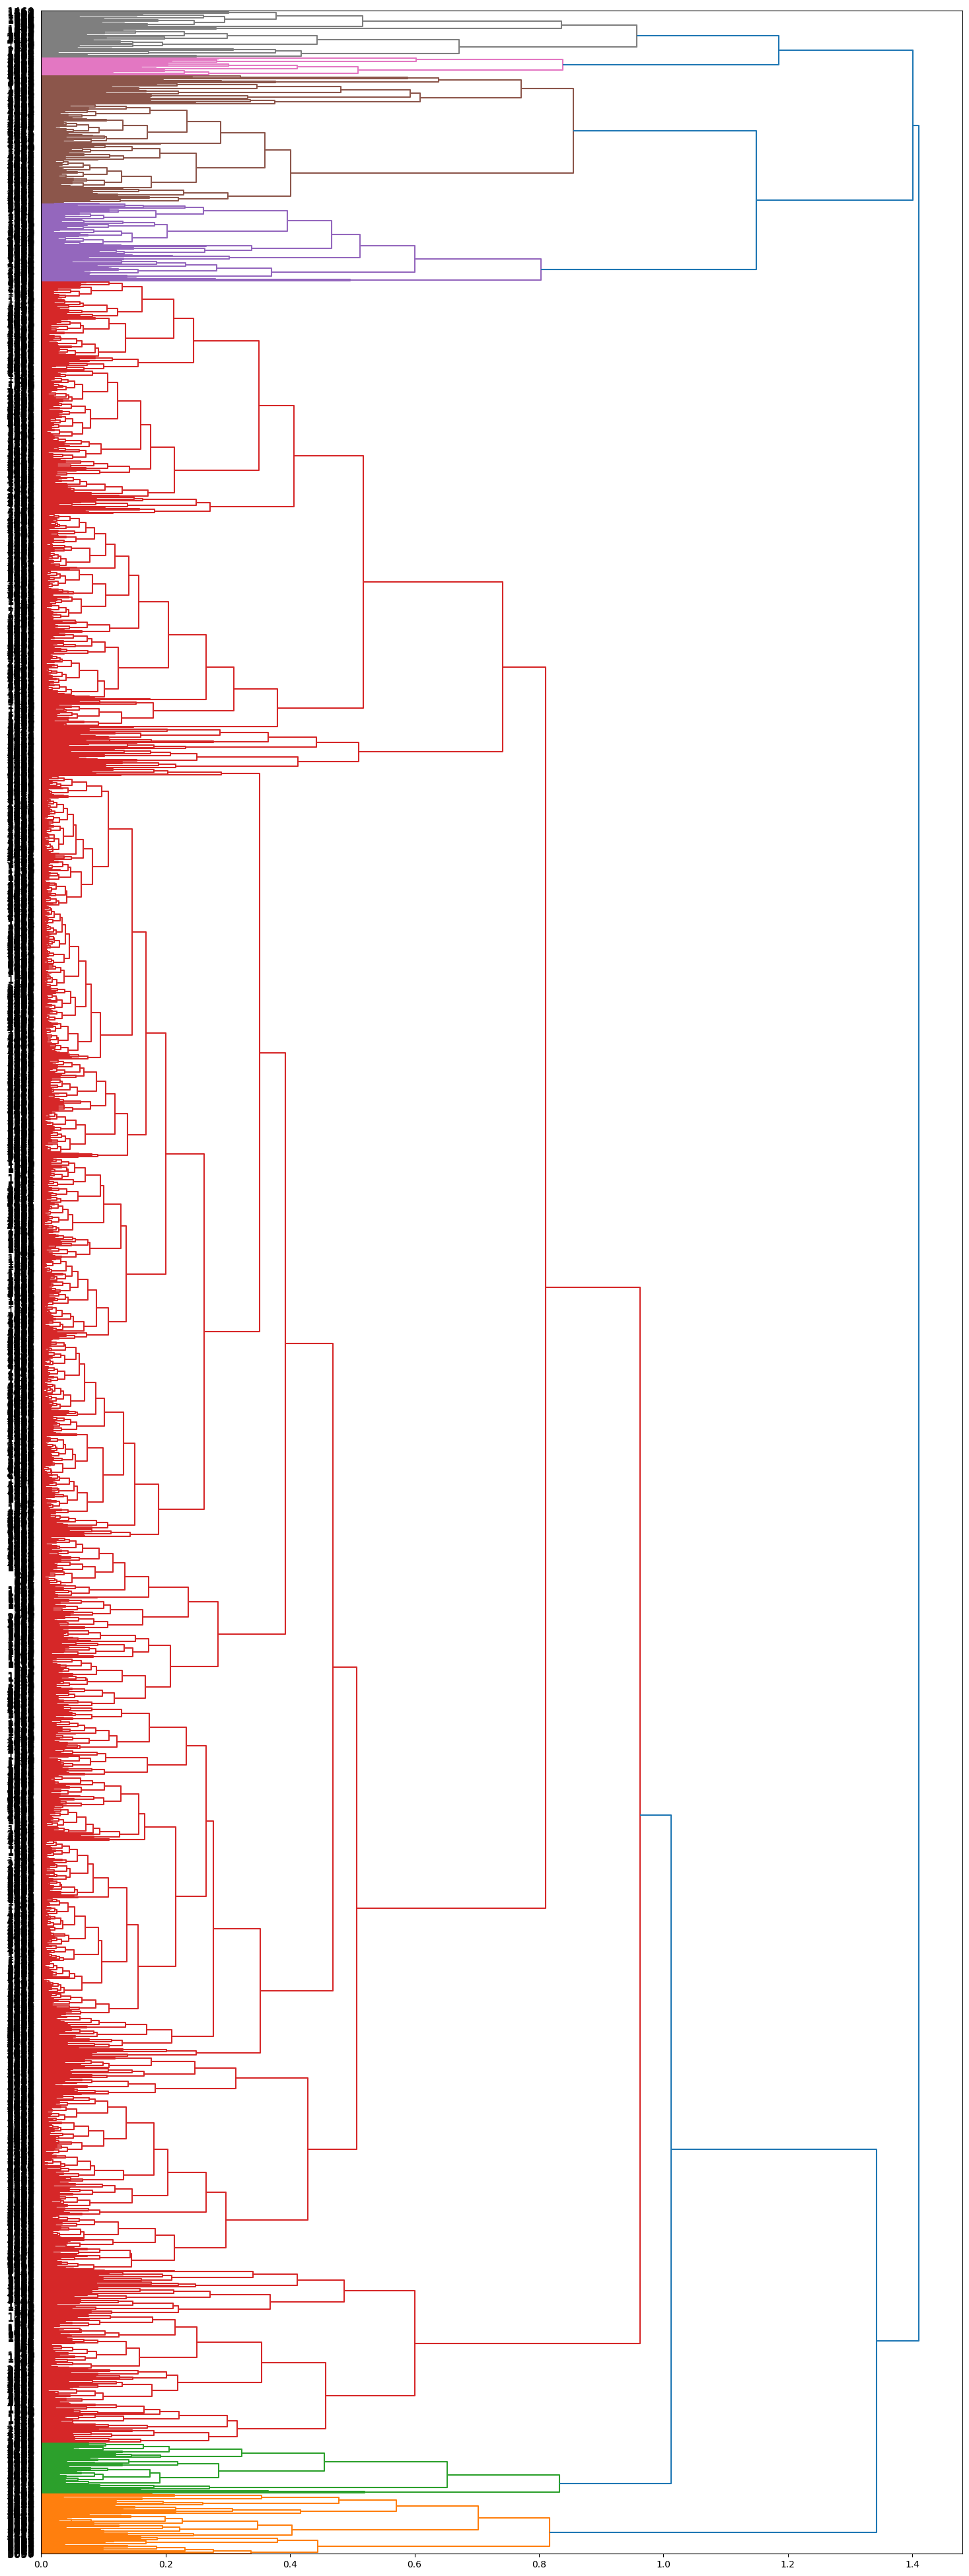

In [11]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pylab
from pylab import *
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Balance'][id], df['Days_since_enroll'][id], int(float(df['Award'][id])) )
dendrogram(z, leaf_rotation=0,leaf_font_size=12,orientation='right')
plt.show()

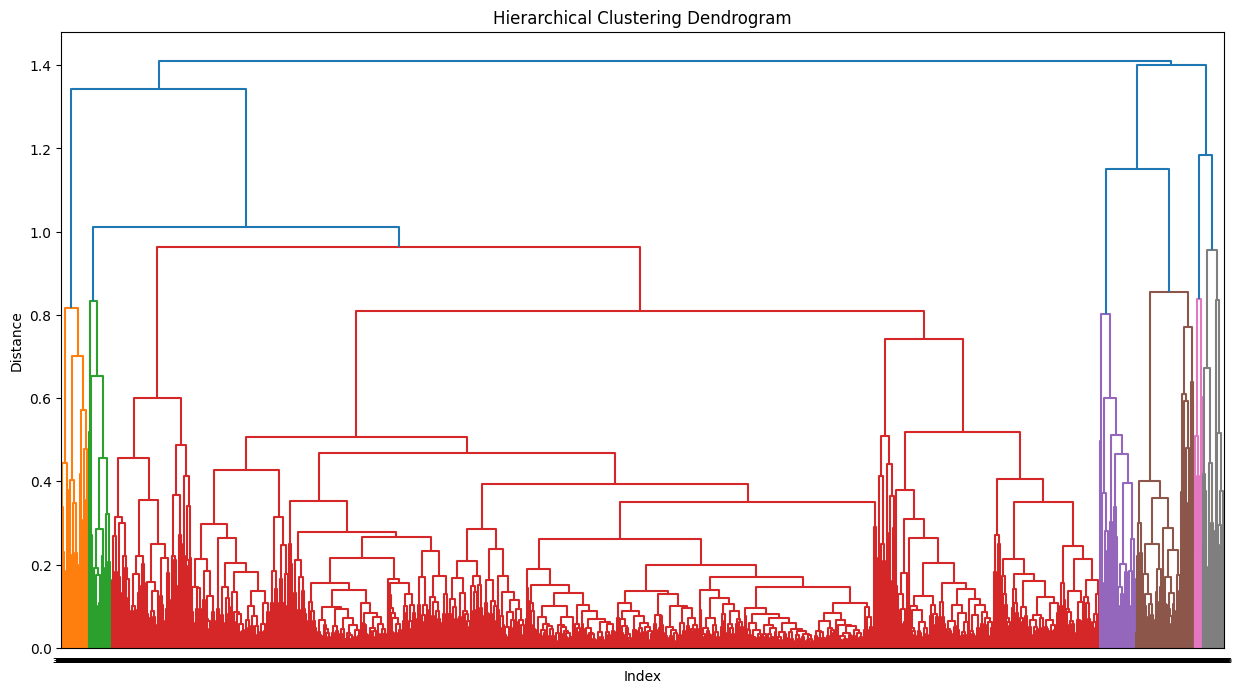

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity="euclidean").fit(df_normalized)
h_complete.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 3])